<a href="https://colab.research.google.com/github/mrpalomochile/Clustering_of_temperature-solar_radiation_ratios_for_the_estimation_of_permafrost_occurrence/blob/main/cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1.- Libraries

##1.1.- Installation of libraries

In [811]:
#!pip install h2o4gpu
!git clone https://github.com/jqmviegas/jqm_cvi.git
!pip install -U scikit-learn


fatal: destination path 'jqm_cvi' already exists and is not an empty directory.
Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.6/dist-packages (0.23.2)


##1.2.- Import libraries

In [812]:
import pandas as pd
from scipy import io
from sklearn import datasets
import seaborn as sns
import numpy as np  
#from jqm_cvi.jqmcvi import base
#import base

##1.3.- Global variable

In [813]:
random_state=0
n_clusters=5

#2.- Reading the data

In [814]:
from sklearn.preprocessing import MinMaxScaler
mat_contents = io.loadmat('/content/matrix40x40.mat',squeeze_me=True,struct_as_record=False)

array =mat_contents['a']
df=pd.DataFrame(array)
print(df.shape)


df


(40, 40)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
0,-0.000004,-0.000004,-0.000004,-0.000004,-0.000004,-0.000004,-0.000004,-0.000005,-0.000006,-0.000006,-0.000006,-0.000005,-0.000005,-0.000005,-0.000005,-0.000006,-0.000006,-0.000006,-0.000007,-0.000008,-0.000008,-0.000008,-0.000008,-0.000010,-0.000010,-0.000010,-0.000009,-0.000009,-0.000008,-0.000008,-0.000008,-0.000008,-0.000008,-0.000009,-0.000009,-0.000009,-0.000009,-0.000009,-0.000008,-0.000008
1,-0.000004,-0.000004,-0.000004,-0.000004,-0.000004,-0.000004,-0.000006,-0.000006,-0.000006,-0.000006,-0.000006,-0.000006,-0.000006,-0.000006,-0.000006,-0.000006,-0.000006,-0.000007,-0.000007,-0.000007,-0.000007,-0.000010,-0.000010,-0.000010,-0.000009,-0.000009,-0.000008,-0.000008,-0.000008,-0.000008,-0.000008,-0.000008,-0.000008,-0.000009,-0.000009,-0.000009,-0.000009,-0.000009,-0.000009,-0.000009
2,-0.000004,-0.000004,-0.000004,-0.000004,-0.000004,-0.000006,-0.000006,-0.000006,-0.000006,-0.000006,-0.000006,-0.000006,-0.000006,-0.000006,-0.000006,-0.000006,-0.000006,-0.000007,-0.000007,-0.000007,-0.000009,-0.000009,-0.000009,-0.000009,-0.000008,-0.000008,-0.000008,-0.000008,-0.000008,-0.000007,-0.000007,-0.000008,-0.000008,-0.000008,-0.000009,-0.000009,-0.000009,-0.000010,-0.000012,-0.000012
3,-0.000004,-0.000004,-0.000004,-0.000004,-0.000006,-0.000006,-0.000006,-0.000006,-0.000006,-0.000006,-0.000006,-0.000006,-0.000006,-0.000007,-0.000007,-0.000007,-0.000006,-0.000006,-0.000007,-0.000007,-0.000008,-0.000008,-0.000008,-0.000008,-0.000008,-0.000008,-0.000008,-0.000008,-0.000008,-0.000008,-0.000008,-0.000008,-0.000008,-0.000009,-0.000009,-0.000009,-0.000011,-0.000012,-0.000012,-0.000012
4,-0.000005,-0.000005,-0.000004,-0.000006,-0.000006,-0.000006,-0.000006,-0.000006,-0.000006,-0.000006,-0.000007,-0.000007,-0.000007,-0.000007,-0.000007,-0.000007,-0.000007,-0.000007,-0.000007,-0.000006,-0.000008,-0.000008,-0.000007,-0.000007,-0.000008,-0.000008,-0.000008,-0.000008,-0.000008,-0.000009,-0.000008,-0.000008,-0.000009,-0.000009,-0.000012,-0.000012,-0.000011,-0.000011,-0.000012,-0.000011
5,-0.000005,-0.000007,-0.000006,-0.000006,-0.000006,-0.000006,-0.000006,-0.000006,-0.000006,-0.000007,-0.000007,-0.000007,-0.000007,-0.000007,-0.000007,-0.000007,-0.000007,-0.000007,-0.000006,-0.000006,-0.000008,-0.000007,-0.000007,-0.000007,-0.000008,-0.000008,-0.000008,-0.000008,-0.000009,-0.000009,-0.000009,-0.000009,-0.000009,-0.000012,-0.000012,-0.000012,-0.000012,-0.000011,-0.000011,-0.000011
6,-0.000007,-0.000007,-0.000007,-0.000007,-0.000006,-0.000006,-0.000006,-0.000006,-0.000006,-0.000006,-0.000007,-0.000007,-0.000007,-0.000007,-0.000007,-0.000007,-0.000007,-0.000007,-0.000007,-0.000008,-0.000008,-0.000008,-0.000008,-0.000008,-0.000009,-0.000008,-0.000008,-0.000008,-0.000008,-0.000009,-0.000009,-0.000009,-0.000012,-0.000013,-0.000013,-0.000013,-0.000012,-0.000011,-0.000011,-0.000011
7,-0.000007,-0.000007,-0.000007,-0.000007,-0.000007,-0.000006,-0.000006,-0.000006,-0.000006,-0.000006,-0.000007,-0.000007,-0.000007,-0.000007,-0.000007,-0.000007,-0.000007,-0.000007,-0.000007,-0.000009,-0.000009,-0.000009,-0.000009,-0.000009,-0.000009,-0.000009,-0.000008,-0.000008,-0.000008,-0.000008,-0.000009,-0.000012,-0.000013,-0.000013,-0.000014,-0.000014,-0.000012,-0.000011,-0.000011,-0.000011
8,-0.000007,-0.000007,-0.000007,-0.000007,-0.000007,-0.000006,-0.000006,-0.000007,-0.000007,-0.000007,-0.000007,-0.000007,-0.000007,-0.000007,-0.000007,-0.000007,-0.000007,-0.000007,-0.000009,-0.000009,-0.000009,-0.000010,-0.000010,-0.000009,-0.000009,-0.000009,-0.000009,-0.000010,-0.000010,-0.000012,-0.000013,-0.000013,-0.000014,-0.000014,-0.000015,-0.000016,-0.000015,-0.000012,-0.000012,-0.000012
9,-0.000006,-0.000006,-0.000007,-0.000007,-0.000006,-0.000006,-0.000007,-0.000007,-0.000007,-0.000007,-0.000007,-0.000007,-0.000007,-0.000007,-0.000007,-0.000007,-0.000009,-0.000009,-0.000010,-0.000010,-0.000010,-0.000010,-0.000010,-0.000009,-0.000008,-0.000009,-0.000012

(1600, 1)


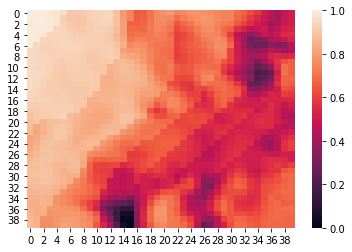

In [815]:
array=array.flatten()
df=pd.DataFrame(array)

scaler = MinMaxScaler()

df[df._get_numeric_data().columns] = scaler.fit_transform(df[df._get_numeric_data().columns])

print(df.shape)
sns.heatmap(array.reshape(40, -1).T)

#3.- Models

In [816]:
labeldf=df.copy()
labeldf

,0
0,1.000000
1,0.997683
2,0.995655
3,0.996234
4,0.998262
...,...
1595,0.666280
1596,0.698146
1597,0.686559
1598,0.674971


##3.1.- KMeans

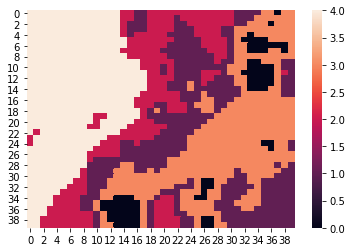

In [817]:
from sklearn.cluster import KMeans

#from h2o4gpu.cluster import KMeans
kmeans=KMeans(n_clusters=n_clusters, random_state=random_state).fit(df)
KMeans(n_clusters=n_clusters, random_state=random_state).fit_predict(df)
labeldf["KMeans"]=pd.DataFrame(kmeans.labels_)
labeldf.drop([0],axis=1,inplace=True)
a=labeldf["KMeans"]

a=np.array(a)
sns.heatmap(a.reshape(40, -1).T)

##3.2.- AffinityPropagation

In [818]:
#from sklearn.cluster import AffinityPropagation
##from h2o4gpu.cluster import AffinityPropagation
##clustering = AffinityPropagation(random_state=random_state).fit(df)
#clustering = AffinityPropagation( random_state=random_state, max_iter=50000,convergence_iter=5000).fit(df)
#labeldf["Affinity"]=pd.DataFrame(clustering.labels_)
#labeldf["Affinity"]

##3.3.- Mean-shift

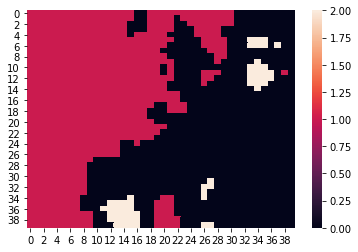

In [819]:
from sklearn.cluster import MeanShift
#from h2o4gpu.cluster import MeanShift
clustering = MeanShift().fit(df)
labeldf["Mean"]=pd.DataFrame(clustering.labels_)
labeldf["Mean"]


a=labeldf["Mean"]

a=np.array(a)
sns.heatmap(a.reshape(40, -1).T)

##3.4.- Spectral clustering

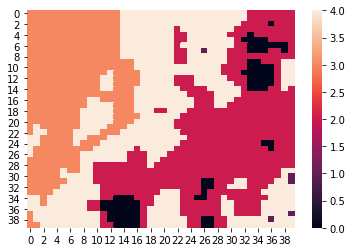

In [820]:
from sklearn.cluster import SpectralClustering
#from h2o4gpu.cluster import SpectralClustering
clustering = SpectralClustering(n_clusters=n_clusters,assign_labels="discretize",random_state=random_state).fit(df)

labeldf["Spectral"]=pd.DataFrame(clustering.labels_)
labeldf["Spectral"]

a=labeldf["Spectral"]

a=np.array(a)
sns.heatmap(a.reshape(40, -1).T)

##3.5.- Ward hierarchical clustering

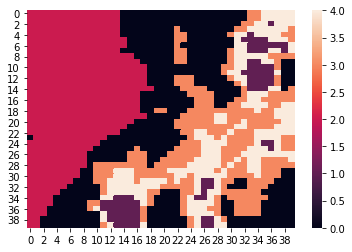

In [821]:
from sklearn.cluster import AgglomerativeClustering
#from h2o4gpu.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=n_clusters,linkage="ward").fit(df)
labeldf["Ward"]=pd.DataFrame(clustering.labels_)

a=labeldf["Ward"]

a=np.array(a)
sns.heatmap(a.reshape(40, -1).T)

##3.6.- Aglomerative Cluster

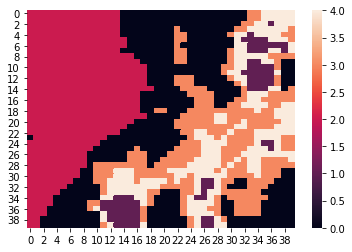

In [822]:
from sklearn.cluster import AgglomerativeClustering
#from h2o4gpu.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=n_clusters).fit(df)

labeldf["Aglomerative"]=pd.DataFrame(clustering.labels_)
labeldf["Aglomerative"]

a=labeldf["Aglomerative"]

a=np.array(a)
sns.heatmap(a.reshape(40, -1).T)

##3.7.- DBSCAN

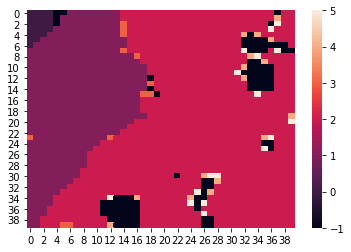

In [823]:
from sklearn.cluster import DBSCAN
#from h2o4gpu.cluster import DBSCAN
clustering = DBSCAN(eps=0.005, min_samples=10).fit(df)

labeldf["DBSCAN"]=pd.DataFrame(clustering.labels_)
labeldf["DBSCAN"]

a=labeldf["DBSCAN"]

a=np.array(a)
sns.heatmap(a.reshape(40, -1).T)

##3.8.- OPTICS

/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_optics.py:804: RuntimeWarning: divide by zero encountered in true_divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


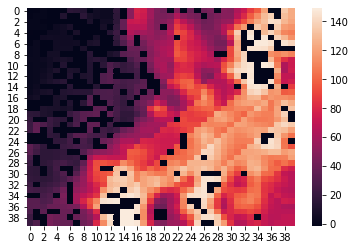

In [824]:
from sklearn.cluster import OPTICS
#from h2o4gpu.cluster import OPTICS
clustering = OPTICS().fit(df)

labeldf["OPTICS"]=pd.DataFrame(clustering.labels_)
labeldf["OPTICS"]


a=labeldf["OPTICS"]

a=np.array(a)
sns.heatmap(a.reshape(40, -1).T)

##3.9.- Gaussian mixtures

In [825]:
##from sklearn.mixture import GaussianMixture
#from h2o4gpu.mixture import GaussianMixture
#clustering = GaussianMixture().fit(df)
#labeldf["Gaus"]=pd.DataFrame(clustering.labels_)
#labeldf["Gaus"]

##3.10.- Birch

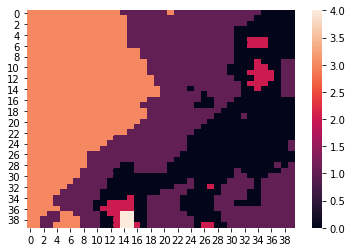

In [826]:
from sklearn.cluster import Birch
#from h2o4gpu.cluster import Birch
clustering = Birch(n_clusters=n_clusters, threshold=0.05).fit(df)
labeldf["Birch"] = pd.DataFrame(clustering.labels_)

a=labeldf["Birch"]

a=np.array(a)
sns.heatmap(a.reshape(40, -1).T)

#4.- Metrics

In [827]:
labeldf

,KMeans,Mean,Spectral,Ward,Aglomerative,DBSCAN,OPTICS,Birch
0,4,1,3,2,2,0,-1,3
1,4,1,3,2,2,0,0,3
2,4,1,3,2,2,0,1,3
3,4,1,3,2,2,0,1,3
4,4,1,3,2,2,0,0,3
...,...,...,...,...,...,...,...,...
1595,1,0,4,0,0,2,74,1
1596,1,0,4,0,0,2,63,1
1597,1,0,1,0,0,2,67,1
1598,1,0,4,0,0,2,71,1


##4.0.-External iberies

In [828]:
# -*- coding: utf-8 -*-
__author__ = "Joaquim Viegas"

""" JQM_CV - Python implementations of Dunn and Davis Bouldin clustering validity indices
dunn(k_list):
    Slow implementation of Dunn index that depends on numpy
    -- basec.pyx Cython implementation is much faster but flower than dunn_fast()
dunn_fast(points, labels):
    Fast implementation of Dunn index that depends on numpy and sklearn.pairwise
    -- No Cython implementation
davisbouldin(k_list, k_centers):
    Implementation of Davis Boulding index that depends on numpy
    -- basec.pyx Cython implementation is much faster
"""

import numpy as np
from sklearn.metrics.pairwise import euclidean_distances

def delta(ck, cl):
    values = np.ones([len(ck), len(cl)])*10000
    
    for i in range(0, len(ck)):
        for j in range(0, len(cl)):
            values[i, j] = np.linalg.norm(ck[i]-cl[j])
            
    return np.min(values)
    
def big_delta(ci):
    values = np.zeros([len(ci), len(ci)])
    
    for i in range(0, len(ci)):
        for j in range(0, len(ci)):
            values[i, j] = np.linalg.norm(ci[i]-ci[j])
            
    return np.max(values)
    
def dunn(k_list):
    """ Dunn index [CVI]
    
    Parameters
    ----------
    k_list : list of np.arrays
        A list containing a numpy array for each cluster |c| = number of clusters
        c[K] is np.array([N, p]) (N : number of samples in cluster K, p : sample dimension)
    """
    deltas = np.ones([len(k_list), len(k_list)])*1000000
    big_deltas = np.zeros([len(k_list), 1])
    l_range = list(range(0, len(k_list)))
    
    for k in l_range:
        for l in (l_range[0:k]+l_range[k+1:]):
            deltas[k, l] = delta(k_list[k], k_list[l])
        
        big_deltas[k] = big_delta(k_list[k])

    di = np.min(deltas)/np.max(big_deltas)
    return di

def delta_fast(ck, cl, distances):
    values = distances[np.where(ck)][:, np.where(cl)]
    values = values[np.nonzero(values)]

    return np.min(values)
    
def big_delta_fast(ci, distances):
    values = distances[np.where(ci)][:, np.where(ci)]
    #values = values[np.nonzero(values)]
            
    return np.max(values)

def dunn_fast(points, labels):
    """ Dunn index - FAST (using sklearn pairwise euclidean_distance function)
    
    Parameters
    ----------
    points : np.array
        np.array([N, p]) of all points
    labels: np.array
        np.array([N]) labels of all points
    """
    distances = euclidean_distances(points)
    ks = np.sort(np.unique(labels))
    
    deltas = np.ones([len(ks), len(ks)])*1000000
    big_deltas = np.zeros([len(ks), 1])
    
    l_range = list(range(0, len(ks)))
    
    for k in l_range:
        for l in (l_range[0:k]+l_range[k+1:]):
            deltas[k, l] = delta_fast((labels == ks[k]), (labels == ks[l]), distances)
        
        big_deltas[k] = big_delta_fast((labels == ks[k]), distances)

    di = np.min(deltas)/np.max(big_deltas)
    return di
    
    
def  big_s(x, center):
    len_x = len(x)
    total = 0
        
    for i in range(len_x):
        total += np.linalg.norm(x[i]-center)    
    
    return total/len_x

def davisbouldin(k_list, k_centers):
    """ Davis Bouldin Index
    
    Parameters
    ----------
    k_list : list of np.arrays
        A list containing a numpy array for each cluster |c| = number of clusters
        c[K] is np.array([N, p]) (N : number of samples in cluster K, p : sample dimension)
    k_centers : np.array
        The array of the cluster centers (prototypes) of type np.array([K, p])
    """
    len_k_list = len(k_list)
    big_ss = np.zeros([len_k_list], dtype=np.float64)
    d_eucs = np.zeros([len_k_list, len_k_list], dtype=np.float64)
    db = 0    

    for k in range(len_k_list):
        big_ss[k] = big_s(k_list[k], k_centers[k])

    for k in range(len_k_list):
        for l in range(0, len_k_list):
            d_eucs[k, l] = np.linalg.norm(k_centers[k]-k_centers[l])

    for k in range(len_k_list):
        values = np.zeros([len_k_list-1], dtype=np.float64)
        for l in range(0, k):
            values[l] = (big_ss[k] + big_ss[l])/d_eucs[k, l]
        for l in range(k+1, len_k_list):
            values[l-1] = (big_ss[k] + big_ss[l])/d_eucs[k, l]

        db += np.max(values)
    res = db/len_k_list
    return res

In [829]:
labeldf

,KMeans,Mean,Spectral,Ward,Aglomerative,DBSCAN,OPTICS,Birch
0,4,1,3,2,2,0,-1,3
1,4,1,3,2,2,0,0,3
2,4,1,3,2,2,0,1,3
3,4,1,3,2,2,0,1,3
4,4,1,3,2,2,0,0,3
...,...,...,...,...,...,...,...,...
1595,1,0,4,0,0,2,74,1
1596,1,0,4,0,0,2,63,1
1597,1,0,1,0,0,2,67,1
1598,1,0,4,0,0,2,71,1


##4.1.- Davies Bouldin score

In [830]:
from sklearn.metrics import davies_bouldin_score
#davies_bouldin_score(df, df1[0])
metric=pd.DataFrame([1])

for labeld in labeldf:
  metric[labeld]=davies_bouldin_score(df,labeldf[labeld])

metric

,0,KMeans,Mean,Spectral,Ward,Aglomerative,DBSCAN,OPTICS,Birch
0,1,0.506008,0.487667,0.839302,0.52934,0.52934,0.96478,6.304283,0.423469


##4.2.- Silhoutte_score

In [831]:
from sklearn.metrics import silhouette_score

for labeld in labeldf:
  metric[labeld]=silhouette_score(df,labeldf[labeld])

metric

,0,KMeans,Mean,Spectral,Ward,Aglomerative,DBSCAN,OPTICS,Birch
0,1,0.575982,0.573571,0.234659,0.563755,0.563755,0.080501,0.576831,0.591287


##4.3.- Dunn index

In [832]:

metric=pd.DataFrame([1])
for labeld in labeldf:
  metric[labeld]=dunn_fast(df,labeldf[labeld])
  
metric

,0,KMeans,Mean,Spectral,Ward,Aglomerative,DBSCAN,OPTICS,Birch
0,1,0.003571,0.008264,0.000725,0.007246,0.007246,0.001765,0.000334,0.012048


#5.- Ploting

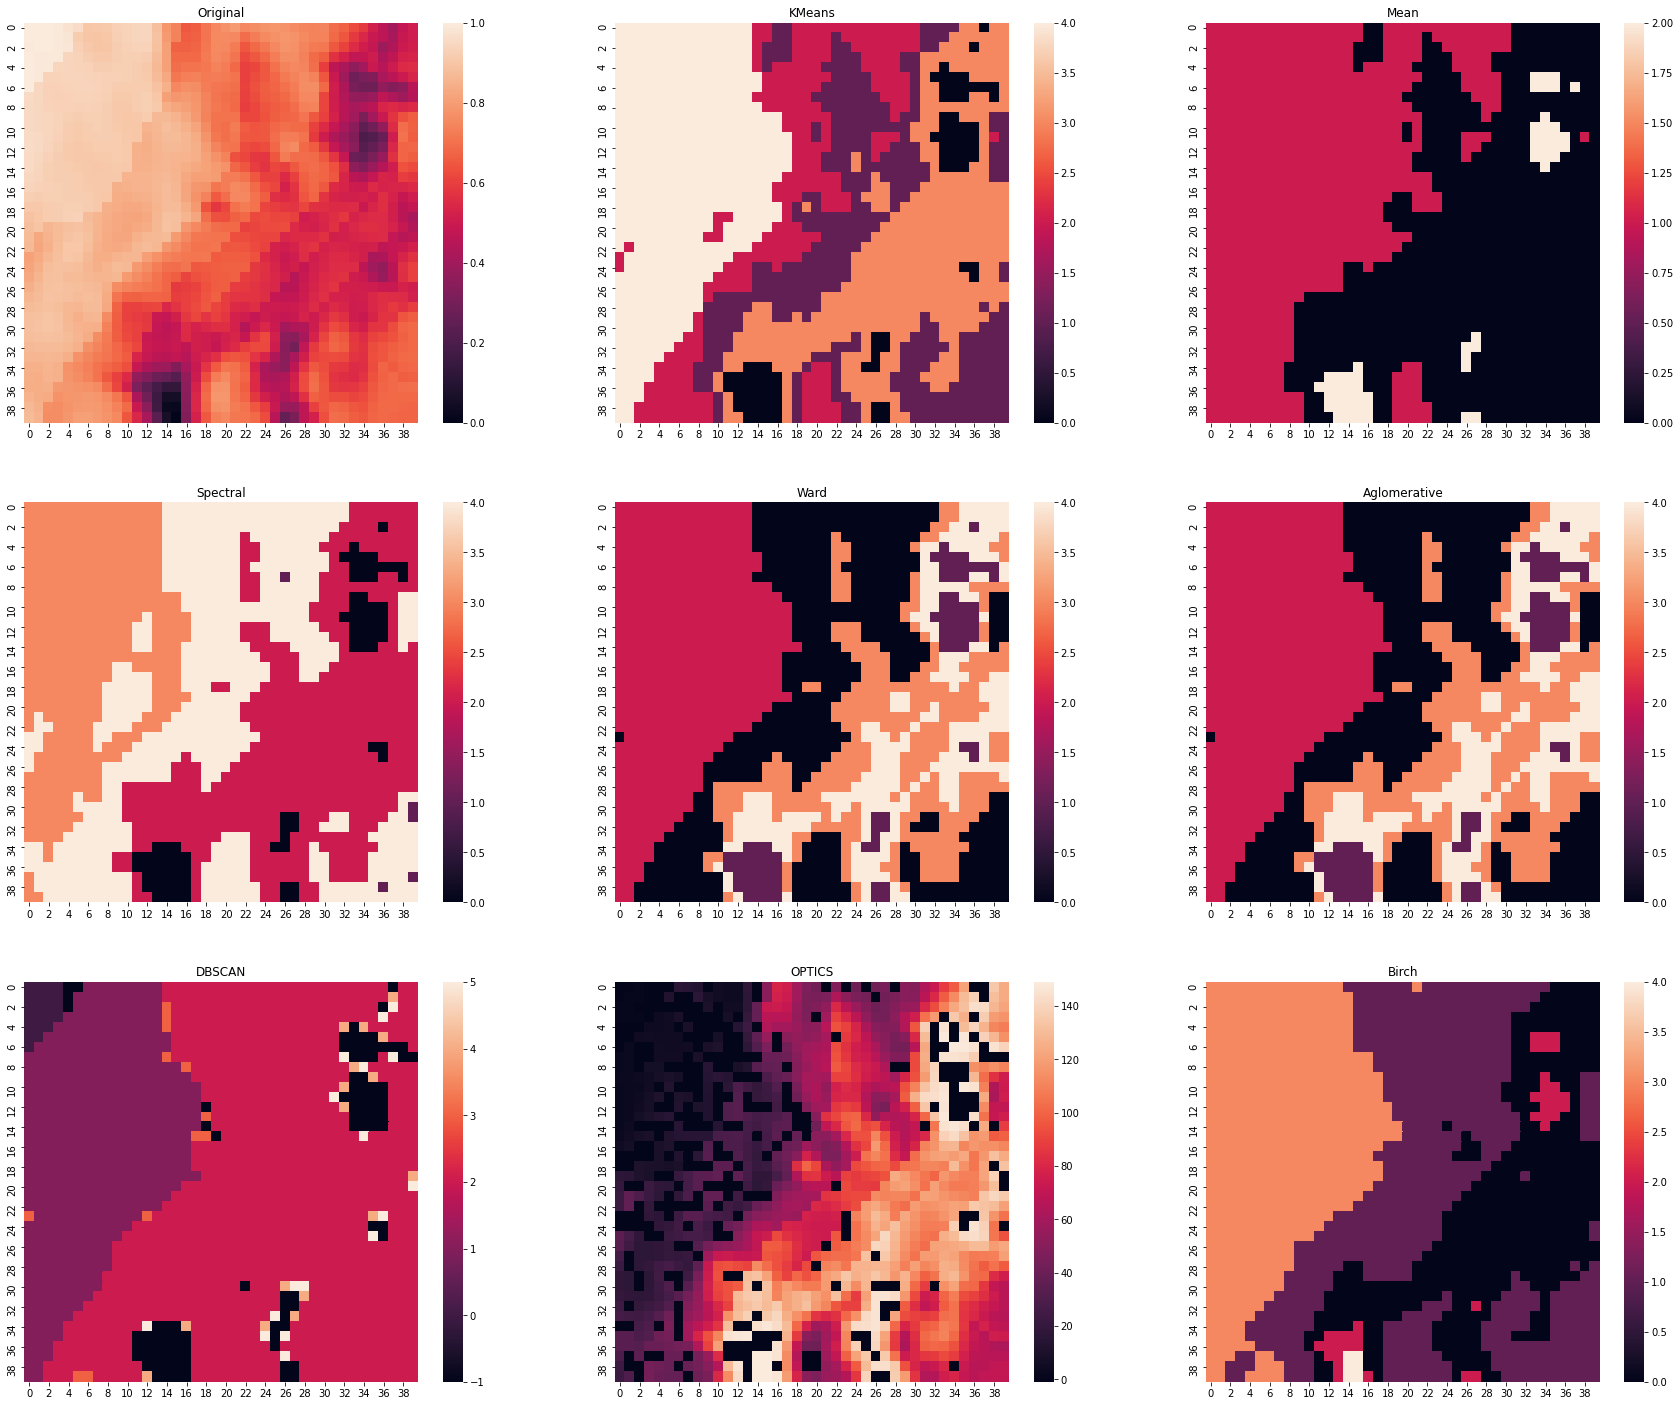

In [833]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(3,3, figsize=(30,25))

labeldf["Original"]= df

labeldf=labeldf[["Original","KMeans","Mean", "Spectral", "Ward", "Aglomerative","DBSCAN","OPTICS","Birch"]]

for i in range(3):
  for j in range(3):
    labeld=labeldf.columns[i*3+j]
    a=labeldf[labeld]
    a=np.array(a)
    sns.heatmap(a.reshape(40, -1).T,ax=ax[i,j])
    ax[i,j].set_title(labeld)